In [65]:
%matplotlib inline
import gensim
import caselawnet
import json
import nltk
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fn = '/media/sf_VBox_Shared/CaseLaw/graphs/json_sigma/wgaans_community.json'


In [3]:
with open(fn) as f:
    network = json.load(f)


In [56]:
textfield = 'abstract'
nodes_df = pd.DataFrame(network['nodes'])
nodes_df.community = nodes_df.community.astype(int)
nodes_df_filtered = nodes_df[nodes_df[textfield].str.len() > 1].copy()

In [57]:
nodes_df_filtered.shape

(77, 26)

In [58]:
stemmer = nltk.stem.snowball.DutchStemmer(ignore_stopwords=True)
def tokenize(text):
    tokenized = nltk.word_tokenize(text)
    return [stemmer.stem(w) for w in tokenized if w.isalnum()]

In [59]:
nodes_df_filtered['tokenized'] = [tokenize(t) for t in nodes_df_filtered[textfield]]

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from stop_words import get_stop_words
# Some options:
ngram_range = (1, 1)
max_df = 0.8
min_df = 2
stop_words = get_stop_words('dutch')
vectorizer = TfidfVectorizer(ngram_range=ngram_range, 
                             max_df=max_df, 
                             min_df=min_df, 
                             tokenizer=tokenize, 
                             stop_words=stop_words)
wordcounts = vectorizer.fit_transform((n[textfield] for i, n in nodes_df_filtered.iterrows()))

In [182]:
wordcounts

<77x411 sparse matrix of type '<class 'numpy.float64'>'
	with 2038 stored elements in Compressed Sparse Row format>

In [62]:
# Calculate similarities
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(wordcounts)

In [63]:
similarities.shape

(77, 77)

In [64]:
ecli_communities = pd.MultiIndex.from_arrays((nodes_df_filtered['community'], nodes_df_filtered['ecli']))
similarities_df = pd.DataFrame(similarities, index=ecli_communities, columns = ecli_communities)
similarities_df = similarities_df.sort_index(axis=0).sort_index(axis=1)

In [103]:
def get_heatmap(df, figsize=(6, 6)):
    fig = plt.figure(figsize=figsize)
    pc = plt.pcolor(df, cmap='coolwarm', vmin=0, vmax=1)
    pc.axes.set_xlim(0, df.shape[0])
    pc.axes.set_ylim(0, df.shape[1])
    pc.axes.invert_yaxis()
    pc.axes.set_xticklabels([])
    pc.axes.set_yticklabels([])
    pc.axes.set_xticks([])
    pc.axes.set_yticks([])

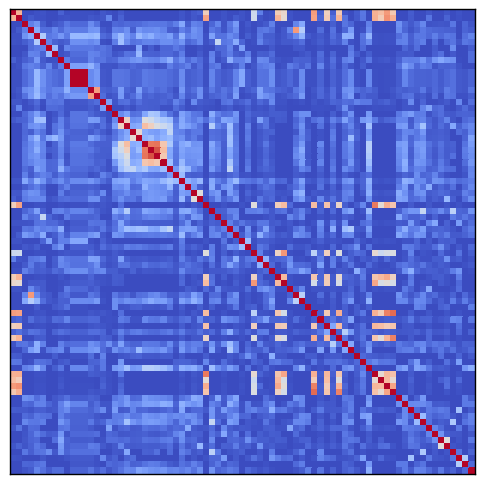

In [104]:
get_heatmap(similarities_df)

0 15


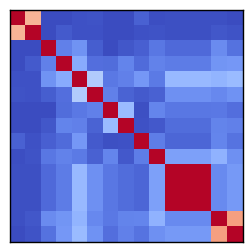

1 2


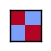

2 15


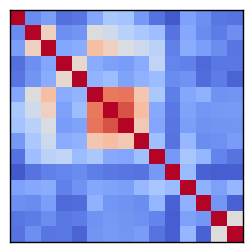

4 6


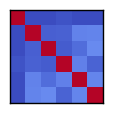

5 2


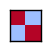

6 3


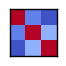

7 1


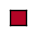

8 5


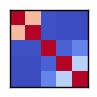

10 1


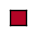

11 2


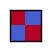

12 2


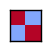

14 2


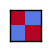

15 2


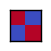

16 2


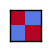

17 2


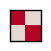

18 3


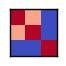

19 1


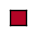

20 2


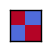

21 1


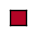

22 2


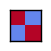

23 2


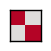

26 1


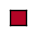

27 2


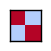

28 1


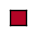

In [107]:
for c in similarities_df.index.levels[0]:
    local_sim = similarities_df.loc[[c], [c]]
    print(c, len(local_sim))
    get_heatmap(local_sim, figsize=(0.2*local_sim.shape[0], 0.2*local_sim.shape[1]))
    plt.show()

In [176]:
similarities_df.head()

community                                            0   \
ecli                             ECLI:NL:HR:2003:AN8478   
community ecli                                            
0         ECLI:NL:HR:2003:AN8478                1.00000   
          ECLI:NL:HR:2004:AO4224                0.68061   
          ECLI:NL:HR:2005:AU3313                0.00000   
          ECLI:NL:HR:2006:AU6092                0.00000   
          ECLI:NL:HR:2006:AW6166                0.01377   

community                                                \
ecli                             ECLI:NL:HR:2004:AO4224   
community ecli                                            
0         ECLI:NL:HR:2003:AN8478               0.680610   
          ECLI:NL:HR:2004:AO4224               1.000000   
          ECLI:NL:HR:2005:AU3313               0.000000   
          ECLI:NL:HR:2006:AU6092               0.034705   
          ECLI:NL:HR:2006:AW6166               0.013150   

community                                                \
ecli                             ECLI:NL:HR:2005:AU3313   
community ecli                                            
0         ECLI:NL:HR:2003:AN8478               0.000000   
          ECLI:NL:HR:2004:AO4224               0.000000   
          ECLI:NL:HR:2005:AU3313               1.000000   
          ECLI:NL:HR:2006:AU6092               0.121355   
          ECLI:NL:HR:2006:AW6166               0.169040   

community                                                \
ecli                             ECLI:NL:HR:2006:AU6092   
community ecli                                            
0         ECLI:NL:HR:2003:AN8478               0.000000   
          ECLI:NL:HR:2004:AO4224               0.034705   
          ECLI:NL:HR:2005:AU3313               0.121355   
          ECLI:NL:HR:2006:AU6092               1.000000   
          ECLI:NL:HR:2006:AW6166               0.238191   

community                                                \
ecli                             ECLI:NL:HR:2006:AW6166   
community ecli                                            
0         ECLI:NL:HR:2003:AN8478               0.013770   
          ECLI:NL:HR:2004:AO4224               0.013150   
          ECLI:NL:HR:2005:AU3313               0.169040   
          ECLI:NL:HR:2006:AU6092               0.238191   
          ECLI:NL:HR:2006:AW6166               1.000000   

community                                                \
ecli                             ECLI:NL:HR:2007:AZ6717   
community ecli                                            
0         ECLI:NL:HR:2003:AN8478               0.015749   
          ECLI:NL:HR:2004:AO4224               0.015039   
          ECLI:NL:HR:2005:AU3313               0.040801   
          ECLI:NL:HR:2006:AU6092               0.080190   
          ECLI:NL:HR:2006:AW6166               0.352591   

community                                                \
ecli                             ECLI:NL:HR:2007:BB5172   
community ecli                                            
0         ECLI:NL:HR:2003:AN8478               0.000000   
          ECLI:NL:HR:2004:AO4224               0.000000   
          ECLI:NL:HR:2005:AU3313               0.000000   
          ECLI:NL:HR:2006:AU6092               0.075405   
          ECLI:NL:HR:2006:AW6166               0.103912   

community                                                \
ecli                             ECLI:NL:HR:2009:BF8875   
community ecli                                            
0         ECLI:NL:HR:2003:AN8478               0.000000   
          ECLI:NL:HR:2004:AO4224               0.000000   
          ECLI:NL:HR:2005:AU3313               0.023647   
          ECLI:NL:HR:2006:AU6092               0.131165   
          ECLI:NL:HR:2006:AW6166               0.121518   

community                                                \
ecli                             ECLI:NL:HR:2010:BK4476   
community ecli                                            
0         ECLI:NL:HR:2003:AN8478       

In [180]:
similarities_df.loc[(slice(None), ecli1), (slice(None), ecli2)]

,community,10
,ecli,ECLI:NL:HR:2015:3019
community,ecli,
10,ECLI:NL:HR:2015:3019,1.0


In [189]:
network['edges'][0]

{'id': 'http://deeplink.rechtspraak.nl/uitspraak?id=ECLI:NL:HR:2012:BV1295_http://deeplink.rechtspraak.nl/uitspraak?id=ECLI:NL:HR:2011:BR5215',
 'source': 'http://deeplink.rechtspraak.nl/uitspraak?id=ECLI:NL:HR:2012:BV1295',
 'target': 'http://deeplink.rechtspraak.nl/uitspraak?id=ECLI:NL:HR:2011:BR5215'}

In [191]:
def get_ecli_from_id(idstr):
    return idstr.split('=')[-1]

In [198]:
ecli_values = nodes_df_filtered['ecli'].values

similarites_edges = []
for l in network['edges']:
    ecli1 = get_ecli_from_id(l['source'])
    ecli2 = get_ecli_from_id(l['target'])
    
    if ecli1 in ecli_values and ecli2 in ecli_values:
        sim = similarities_df.loc[(slice(None), ecli1), (slice(None), ecli2)].values[0][0]
        similarites_edges.append(sim)
similarites_edges = np.array(similarites_edges)

In [209]:
similarities_nondiag = similarities[np.triu_indices(similarities.shape[0], 1)]

In [211]:
print('All: {:.2f}±{:.2f}'.format(np.mean(similarities_nondiag), np.std(similarities_nondiag)))
print('Linked: {:.2f}±{:.2f}'.format(np.mean(similarites_edges), np.std(similarites_edges)))

All: 0.08±0.13
Linked: 0.18±0.16


In [212]:
import scipy
res = scipy.stats.ttest_ind(similarities_nondiag, similarites_edges, equal_var=False)
print(res)
print('p-value: {:.3f}'.format(res.pvalue / 2))

Ttest_indResult(statistic=-4.8215847456419016, pvalue=9.9803716519323867e-06)
p-value: 0.000


# TSNE

In [109]:
from sklearn.manifold import TSNE

In [164]:
n_communities = nodes_df_filtered['community'].max()
cmap = plt.cm.get_cmap('Set3', n_communities)

In [165]:
n_communities

28

learning rate:  100


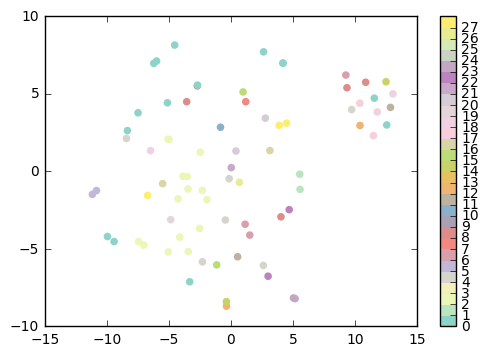

In [168]:
for learning_rate in [100]:
    print('learning rate: ', learning_rate)
    for i in range(1):
        tsne_model = TSNE(n_components=2, perplexity=20, learning_rate=learning_rate, metric='cosine')
        dat_tsne = tsne_model.fit_transform(wordcounts.toarray())
        fig, ax = plt.subplots()
        color = nodes_df_filtered['community']
        sc = ax.scatter(dat_tsne[:,0], dat_tsne[:,1], c=color, cmap=cmap, label=color, lw=0, s=30)
        cb = plt.colorbar(sc, ticks=range(0, n_communities))
        
        plt.show()